In [1]:
# Uninstall old version
!pip uninstall -y diffusers

# Install latest version from GitHub source
!pip install git+https://github.com/huggingface/diffusers.git


Found existing installation: diffusers 0.35.0.dev0
Uninstalling diffusers-0.35.0.dev0:
  Successfully uninstalled diffusers-0.35.0.dev0
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-y1ojnqqb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-y1ojnqqb
  Resolved https://github.com/huggingface/diffusers.git to commit 638cc035e5ecf5c05331c449745f327dbb15e4de
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.35.0.dev0-py3-none-any.whl size=4014780 sha256=6b03939a61cc4747f5a035924c044963e564ed70ed0b0e7f19c313123e3032ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-dr60i9zv/wheels/d2/5c/5f/16639722ea17ecb73ab461b81718584bac08af2801619786b9
Successfully built diffusers


In [2]:
!pip install -q transformers accelerate bitsandbytes safetensors

In [3]:
from huggingface_hub import login

# Enter your HF access token here (you'll be prompted to paste it)
login()

In [4]:
pretrained_model_name_or_path = "stabilityai/stable-diffusion-2-1"
output_dir = "./dreambooth_lora_output"
instance_prompt = "a photo of vk cricketer"  # <-- use your unique token!
instance_data_dir = "./vk"  # folder with 3-10 subject images

In [5]:
!accelerate launch /content/train_dreambooth_lora.py \
  --pretrained_model_name_or_path=stabilityai/stable-diffusion-2-1 \
  --instance_data_dir=./vk \
  --output_dir=./dreambooth_lora_output \
  --instance_prompt="a photo of vk cricketer" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-4 \
  --lr_scheduler=constant \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --mixed_precision=fp16 \
  --use_8bit_adam


ipex flag is deprecated, will be removed in Accelerate v1.10. From 2.7.0, PyTorch has all needed optimizations for Intel CPU and XPU.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-07-22 07:25:24.873653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753169125.113453   13017 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753169125.177123   13017 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attemp

In [6]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image  # ✅ Make sure to import this
import IPython.display as display  # ✅ For displaying in Colab

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16,
).to("cuda")

pipe.load_lora_weights("dreambooth_lora_output", prefix=None)

`flash-attn` is not available or the version is too old. Please install `flash-attn>=2.6.3`.
`sageattention` is not available or the version is too old. Please install `sageattention>=2.1.1`.
`xformers` is not available or the version is too old. Please install `xformers>=0.0.29`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/50 [00:00<?, ?it/s]

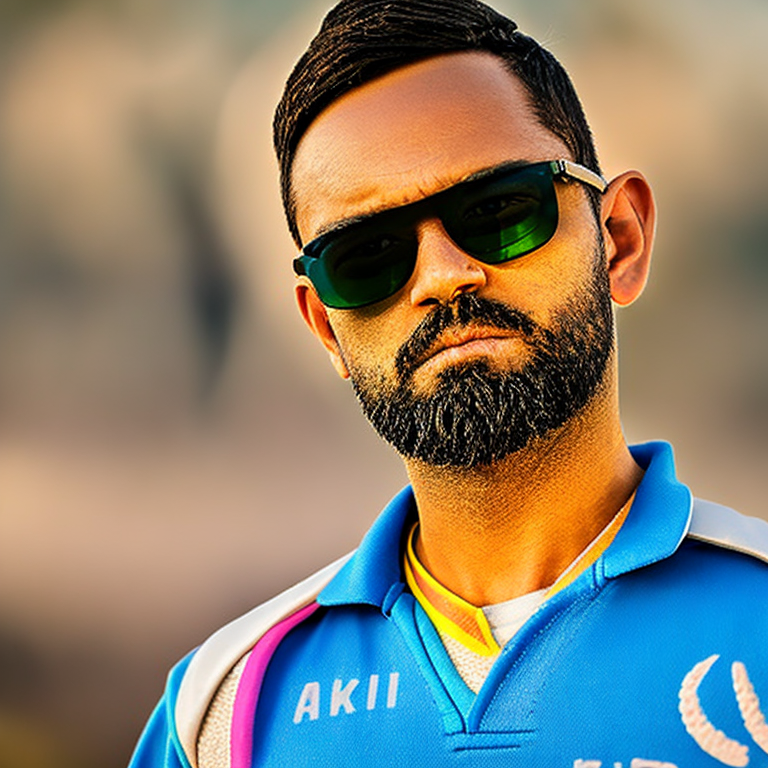

In [21]:
prompt = "A photorealistic portrait of vk cricketer wearing reflective sunglasses, standing on a cricket field during golden hour, cinematic lighting, ultra-detailed, DSLR style, 85mm lens, soft shadows, eiffel tower background, natural skin texture"
image = pipe(prompt).images[0]

# ✅ Save the image
image.save("sks_dog_with_sunglasses.png")

# ✅ Display image in Colab
display.display(image)
